In [3]:
import zipfile
import os
import pandas as pd

In [6]:
# Path to the zip file
zip_file_path = '.\Dataset-zip\PRAICP-1004-RainfallTS.zip'

# Path to the dataset folder
dataset_folder = '.\Dataset-org'

# Create the dataset folder if it doesn't exist
os.makedirs(dataset_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_folder)

print(f"Data extracted to {dataset_folder}")

Data extracted to .\Dataset-org


In [14]:
# Load datasets
df_highest_monthly_total = pd.read_csv('Dataset-org/Data/rainfall-monthly-highest-daily-total.csv')
df_rainy_days = pd.read_csv('Dataset-org/Data/rainfall-monthly-number-of-rain-days.csv')
df_total_rainfall = pd.read_csv('Dataset-org/Data/rainfall-monthly-total.csv')

# Merge datasets on 'month'
df_combined = pd.merge(df_highest_monthly_total, df_rainy_days, on='month')
df_combined = pd.merge(df_combined, df_total_rainfall, on='month')

# Convert 'month' column to datetime if not already
df_combined['month'] = pd.to_datetime(df_combined['month'], format='%Y-%m')

# Format the 'month' column to display only Year and Month (YYYY-MM) as a string
df_combined['month'] = df_combined['month'].dt.strftime('%Y-%m')

# Display the combined dataframe to verify the result
print(df_combined)

       month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
0    1982-01                       36.5                10           107.1
1    1982-02                        9.4                 5            27.8
2    1982-03                       61.7                11           160.8
3    1982-04                       45.1                14           157.0
4    1982-05                       33.0                10           102.2
..       ...                        ...               ...             ...
457  2020-02                       23.8                 8            65.0
458  2020-03                       47.4                 8           108.8
459  2020-04                       51.8                12           188.0
460  2020-05                       53.8                16           255.6
461  2020-06                       41.0                21           233.8

[462 rows x 4 columns]


In [16]:
df_combined.to_csv('Dataset-org/Data/df_combined.csv',index=False)

In [4]:
org_df=pd.read_csv('Dataset-org/Data/df_combined.csv')
org_df

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
0,1982-01,36.5,10,107.1
1,1982-02,9.4,5,27.8
2,1982-03,61.7,11,160.8
3,1982-04,45.1,14,157.0
4,1982-05,33.0,10,102.2
...,...,...,...,...
457,2020-02,23.8,8,65.0
458,2020-03,47.4,8,108.8
459,2020-04,51.8,12,188.0
460,2020-05,53.8,16,255.6


Text(0, 0.5, 'Month')

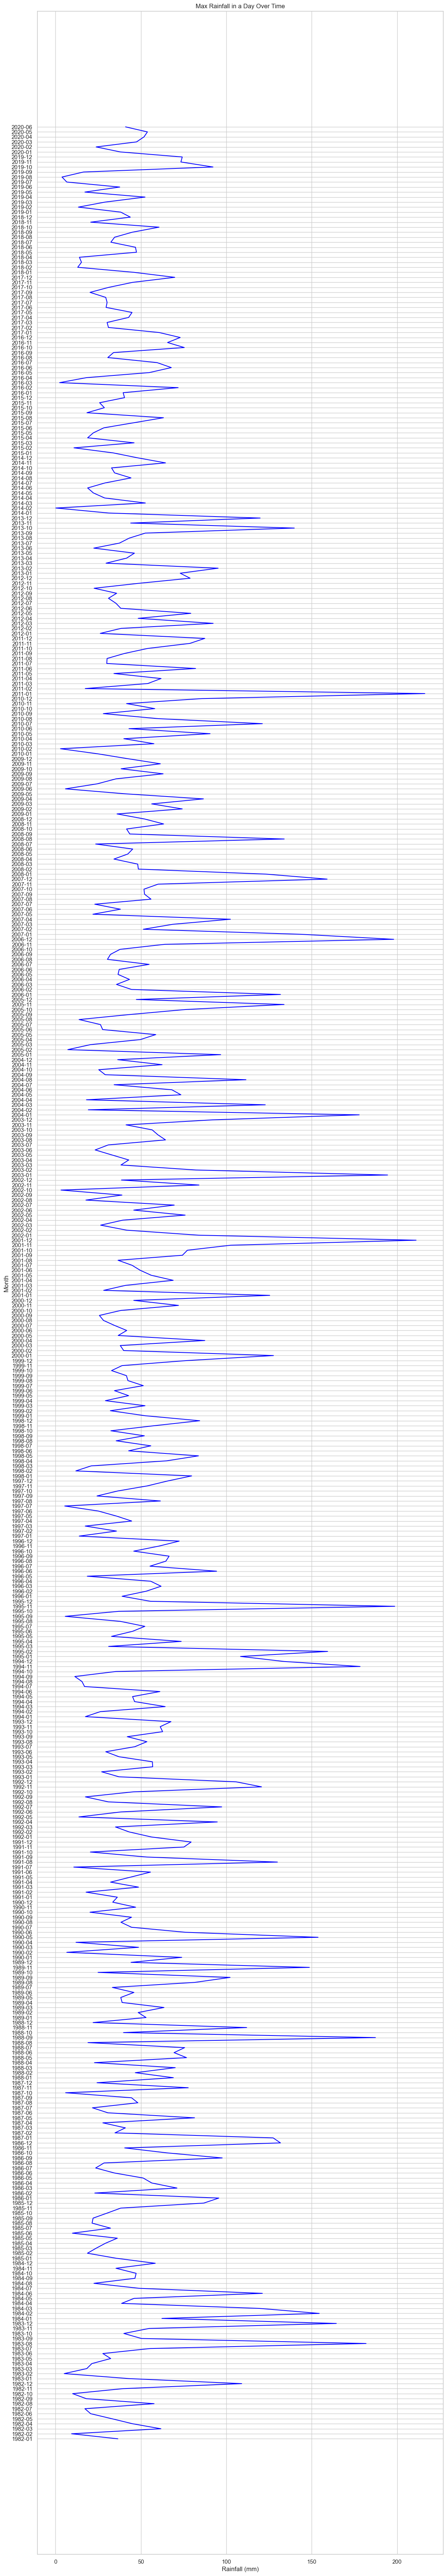

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and size
sns.set_theme(style='whitegrid')
plt.figure(figsize=(14, 300))

# Plot highest daily rainfall
plt.subplot(3, 1, 1)
plt.plot(org_df['maximum_rainfall_in_a_day'],org_df['month'], label='Max Rainfall in a Day', color='blue')
plt.title('Max Rainfall in a Day Over Time')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Month')